## Exercise 1

# Import the libraries

In [11]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load the JJ dataset


In [ ]:

jj_data = sm.datasets.get_rdataset('JohnsonJohnson', package='datasets')




# Convert to pandas DataFrame with time index


In [ ]:
jj_df = pd.Series(jj_data.data['value'].values, 
                  index=pd.date_range(start='1960-01-01', periods=len(jj_data.data), 
                                     freq='Q'),
                  name='Earnings')

# View the data


In [ ]:
print(jj_df.head())

# Plot the time series


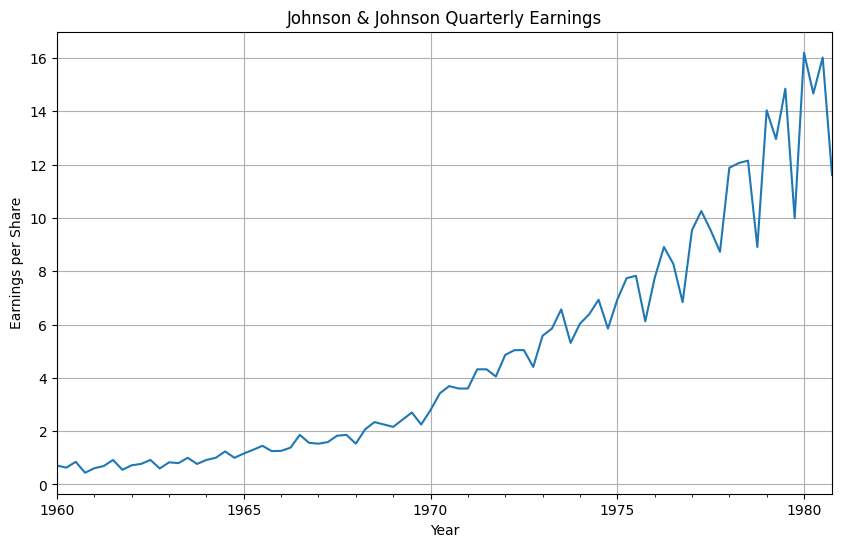

In [ ]:

plt.figure(figsize=(10, 6))
jj_df.plot()
plt.title('Johnson & Johnson Quarterly Earnings')
plt.ylabel('Earnings per Share')
plt.xlabel('Year')
plt.grid(True)
plt.show()

## The sales are increasing aka: there's a trend, therefore the data is not stationary 

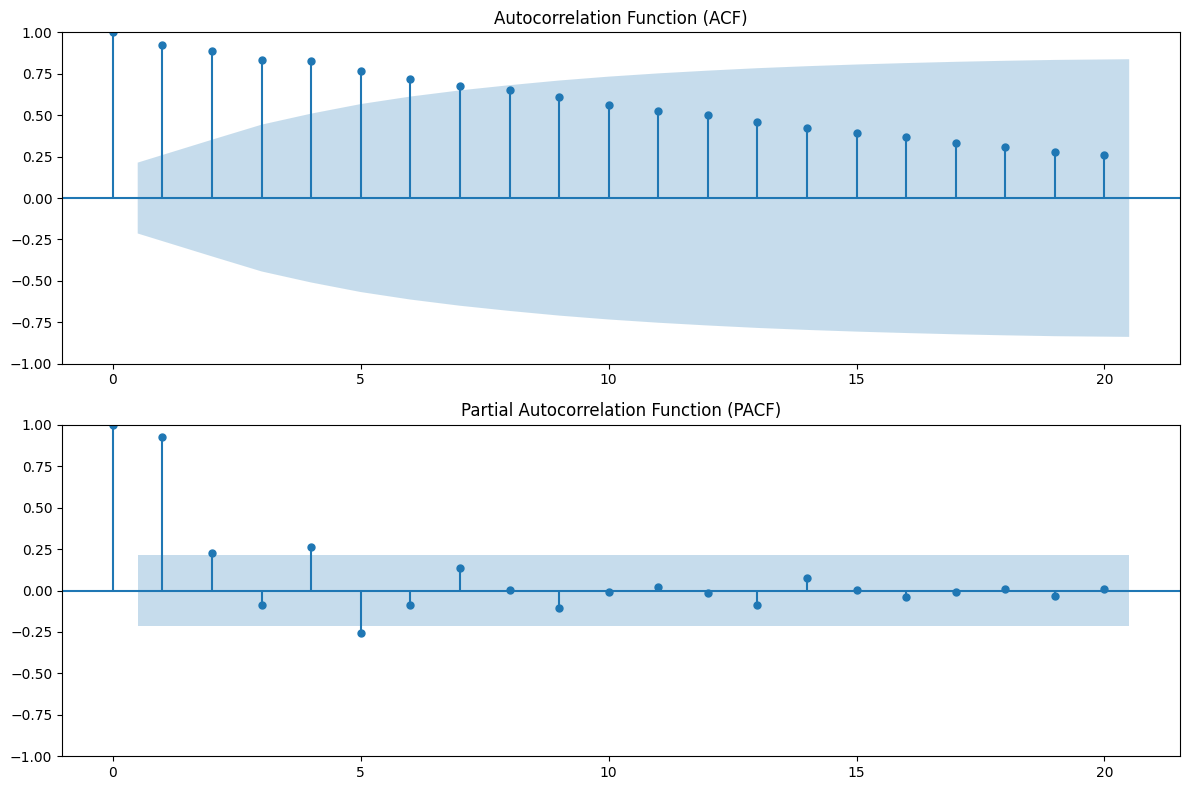

In [6]:
plt.figure(figsize=(12, 8))
# Plot ACF
plt.subplot(211)
plot_acf(jj_df, lags=20, ax=plt.gca(), title='Autocorrelation Function (ACF)')
# Plot PACF
plt.subplot(212)
plot_pacf(jj_df, lags=20, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


## we use i = 2 

Text(0.5, 1.0, 'Time Series of Logarithm of Earnings')

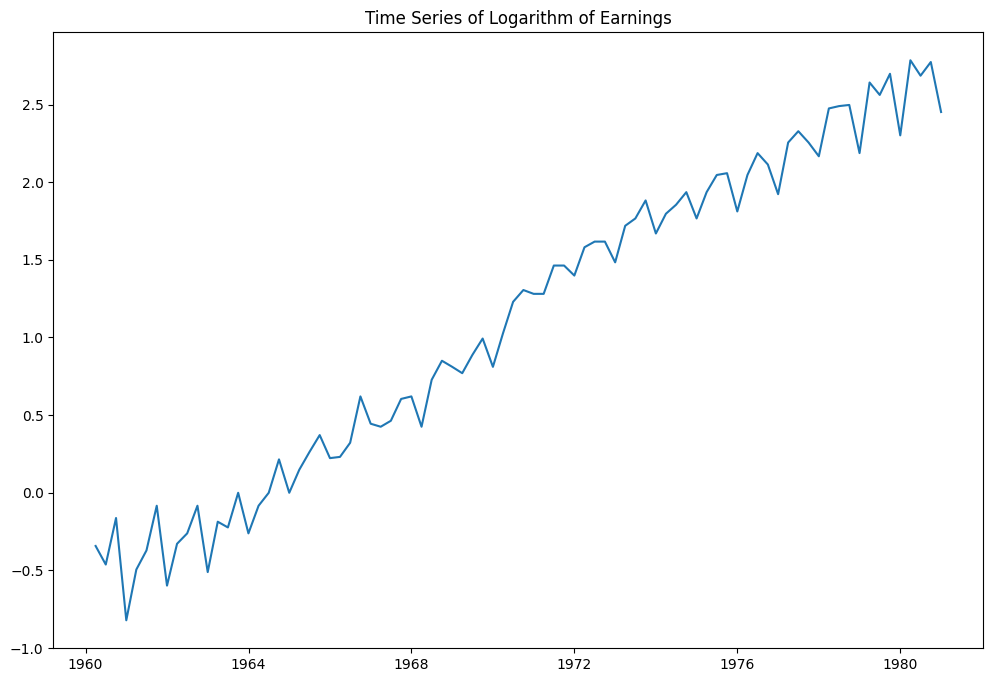

In [9]:
# Compute the logarithm of the earnings data
jj_df_log = np.log(jj_df)

# Plot the Time Series of Logarithms
plt.figure(figsize=(12, 8))
plt.plot(jj_df_log, label='Logarithm of Earnings')
plt.title('Time Series of Logarithm of Earnings')


The trend is removed, the data is more stationary now. 

# Perform Augmented Dickey-Fuller test

In [12]:
adf_test = adfuller(jj_df_log)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print('Critical Value ({}): {}'.format(key, value))

ADF Statistic: -0.8040574568307407
p-value: 0.8179273139117218
Critical Value (1%): -3.5159766913976376
Critical Value (5%): -2.898885703483903
Critical Value (10%): -2.5866935058484217


# Perform KPSS test

In [13]:
kpss_test = kpss(jj_df_log, regression='c')
print('\nKPSS Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {}'.format(key, value))


KPSS Statistic: 1.4918056237883734
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


/var/folders/rv/7k63c71j1f57_q_npvwwsjp00000gn/T/ipykernel_44287/1843167282.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(jj_df_log, regression='c')


# Compute the differences of the transformed values


In [14]:
jj_df_log_diff = jj_df_log.diff().dropna()


# Plot the Time Series of Differences of Logarithms


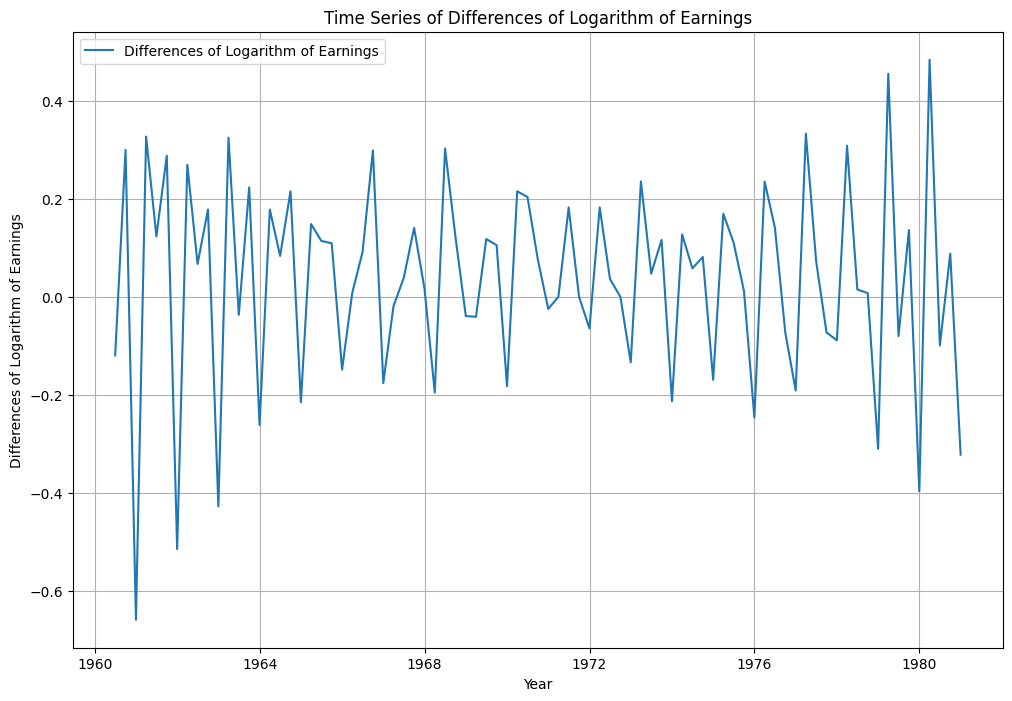

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(jj_df_log_diff, label='Differences of Logarithm of Earnings')
plt.title('Time Series of Differences of Logarithm of Earnings')
plt.xlabel('Year')
plt.ylabel('Differences of Logarithm of Earnings')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2